In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
from statsmodels.graphics.api import qqplot

## ACE ARIMA analysis
Do ARIMA analysis of ACE

Main reference: https://www.justintodata.com/arima-models-in-python-time-series-prediction/

Code to make datetime and remove NaNs:

In [ ]:
# ace_1min_14_22=pd.read_csv(r"..\ImportData\ace_1min_14_22.csv")
# ace_1min_14_22['datetime'] = pd.to_datetime(ace_1min_14_22["GMTTime"])
# ace_1min_14_22_nan_removed = ace_1min_14_22[np.logical_not(ace_1min_14_22['1 Min ACE Average'].isnull())]
# ace_1min_14_22_nan_removed = pd.read_pickle("ace_1min_14_22_nan_removed.pkl")


In [3]:
ace_1min_14_22_nan_removed = pd.read_pickle("ace_1min_14_22_nan_removed.pkl")


In [4]:
dta = ace_1min_14_22_nan_removed['1 Min ACE Average']

In [8]:
ace_1min_14_22_nan_removed.iloc[:10000]

,GMTTime,1 Min ACE Average,datetime
0,2014-03-01T06:00:00Z,-26.991,2014-03-01 06:00:00+00:00
1,2014-03-01T06:01:00Z,-86.129,2014-03-01 06:01:00+00:00
2,2014-03-01T06:02:00Z,-95.177,2014-03-01 06:02:00+00:00
3,2014-03-01T06:03:00Z,-69.576,2014-03-01 06:03:00+00:00
4,2014-03-01T06:04:00Z,-31.908,2014-03-01 06:04:00+00:00
...,...,...,...
9995,2014-03-08T04:37:00Z,-124.560,2014-03-08 04:37:00+00:00
9996,2014-03-08T04:38:00Z,-37.590,2014-03-08 04:38:00+00:00
9997,2014-03-08T04:39:00Z,-46.445,2014-03-08 04:39:00+00:00
9998,2014-03-08T04:40:00Z,67.835,2014-03-08 04:40:00+00:00


In [5]:
dta = ace_1min_14_22_nan_removed['1 Min ACE Average']
dta_full = dta
dta = dta_full[:10000]

C:\Users\chen5\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


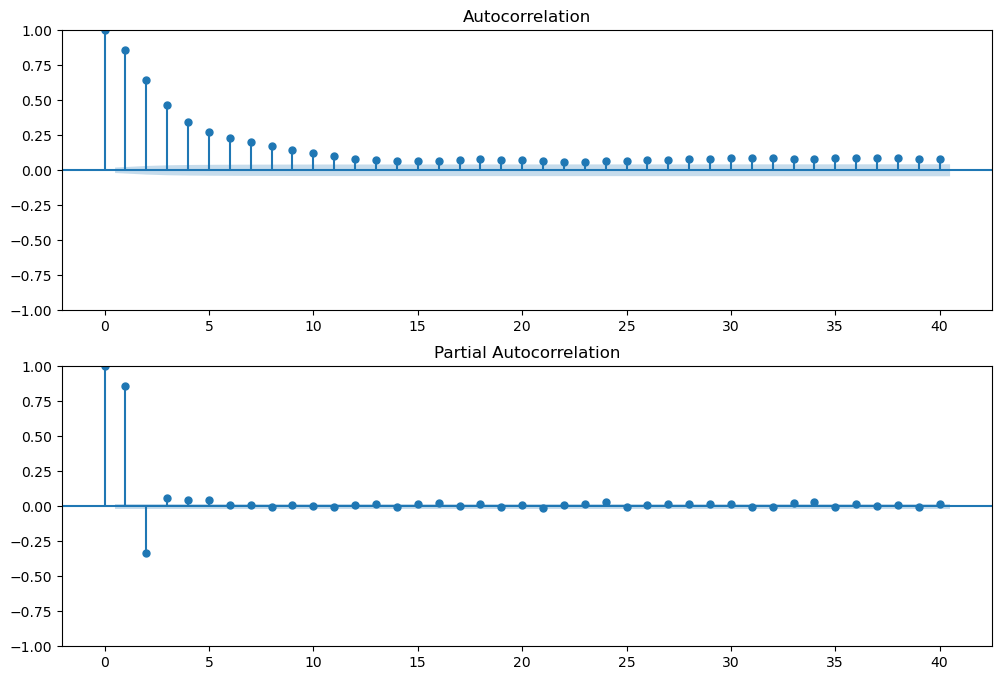

In [7]:
# From Lab 4
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

ACF does drop around 10, PACF has spike at 1 and negative spike at 2. Maybe choose p = 2?

In [ ]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# ADF

In [18]:

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(dta)
print(f'p-value: {adf_test[1]}')


p-value: 0.0


ADF test suggests already stationary

Try p = 1 and p = 2

In [30]:
# TODO: chose p appropriately
p = 1

arma_mod = sm.tsa.ARIMA(dta, order=(p,0,0)).fit()
print(arma_mod.params)
# https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# show summary
print(arma_mod.summary())

const      -20.953581
ar.L1        0.856107
sigma2    3330.043901
dtype: float64
                               SARIMAX Results                                
Dep. Variable:      1 Min ACE Average   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -54743.255
Date:                Wed, 16 Nov 2022   AIC                         109492.509
Time:                        12:13:21   BIC                         109514.140
Sample:                             0   HQIC                        109499.831
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.9536      4.062     -5.158      0.000     -28.915     -12.992
ar.L1          0.8561      0.002    354.202      0

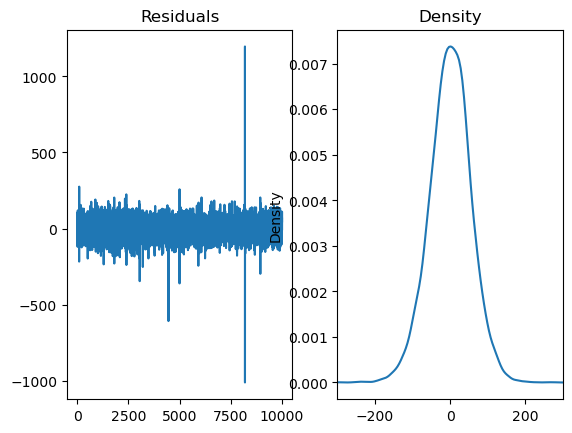

In [31]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# look at residuals
model_fit = arma_mod
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[1].set_xlim(-300,300)
plt.show()


C:\Users\chen5\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


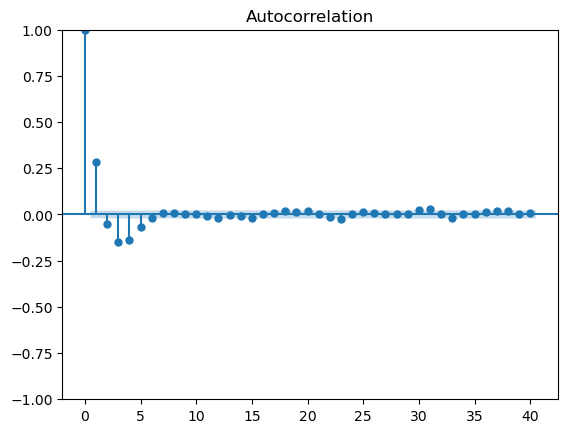

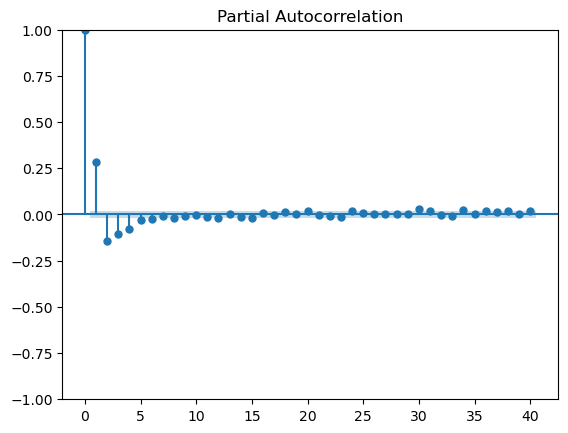

In [32]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)


Looks worse than AR(2), there is some correlation with lag 1 in residuals.

### p = 2 ARIMA: AR(2)

In [33]:
# TODO: chose p appropriately
p = 2

arma_mod = sm.tsa.ARIMA(dta, order=(p,0,0)).fit()
print(arma_mod.params)
print(arma_mod.summary())

const      -20.953586
ar.L1        1.138969
ar.L2       -0.330337
sigma2    2966.532171
dtype: float64
                               SARIMAX Results                                
Dep. Variable:      1 Min ACE Average   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -54165.449
Date:                Wed, 16 Nov 2022   AIC                         108338.897
Time:                        12:14:27   BIC                         108367.738
Sample:                             0   HQIC                        108348.660
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.9536      2.925     -7.164      0.000     -26.686     -15.221
ar.L1          1.1390      0

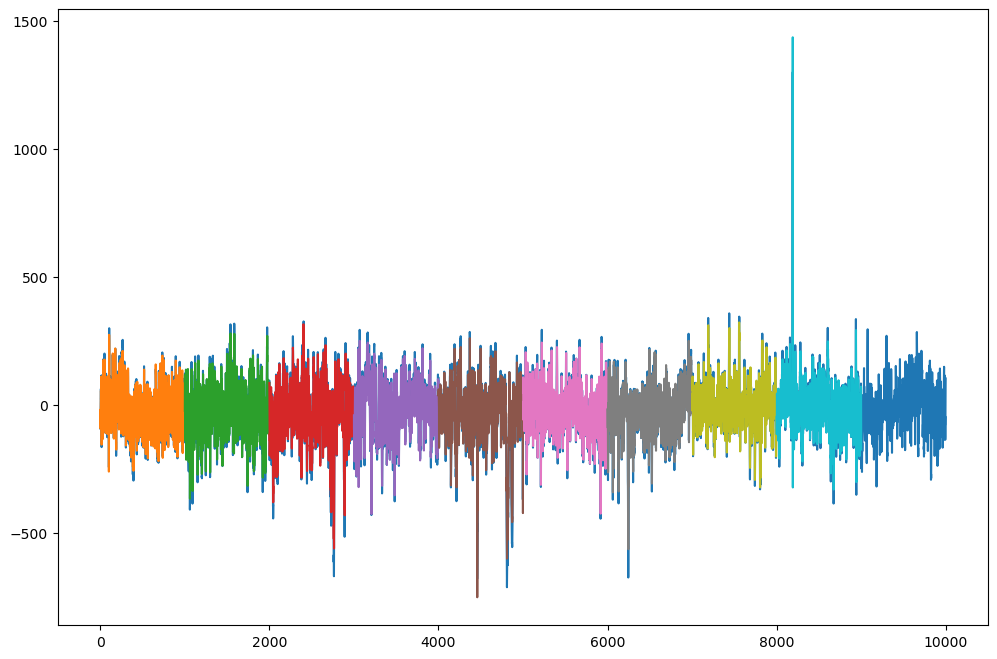

In [34]:
tsteps= 1000

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['0':].plot(ax=ax)
T = np.arange(0, 10000, tsteps)
for tt in range(len(T)-1):
    pred = arma_mod.predict(int(T[tt]), int(T[tt+1]))#, ax=ax, plot_insample=False)
    pred.plot(ax=ax)
plt.show()


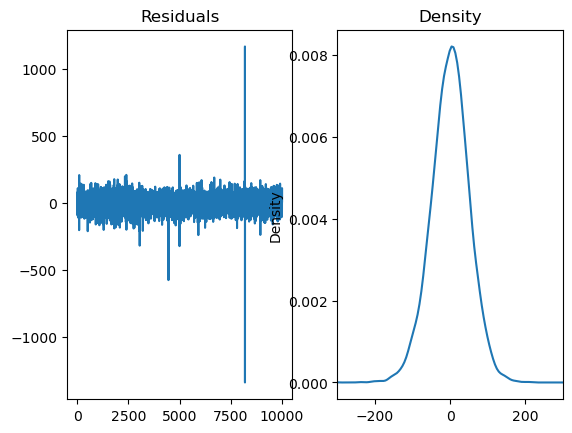

In [35]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# look at residuals
model_fit = arma_mod
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
ax[1].set_xlim(-300,300)
plt.show()


C:\Users\chen5\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


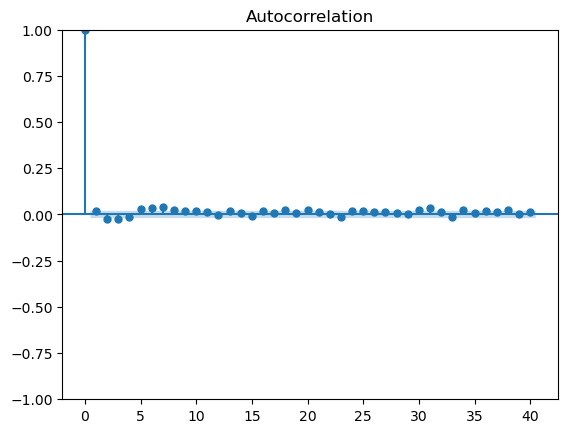

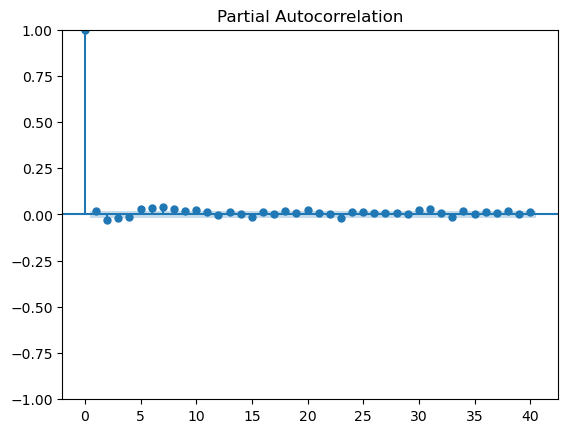

In [36]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)


Residuals look like white noise.

In [44]:
df_train

0       -26.991
1       -86.129
2       -95.177
3       -69.576
4       -31.908
         ...   
9995   -124.560
9996    -37.590
9997    -46.445
9998     67.835
9999    102.160
Name: 1 Min ACE Average, Length: 10000, dtype: float64

In [52]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
df_train = dta
df_test = dta_full[10000:10010]
df = ace_1min_14_22_nan_removed.iloc[:10010]

C:\Users\chen5\AppData\Local\Temp\ipykernel_21368\2522743311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)


<AxesSubplot:>

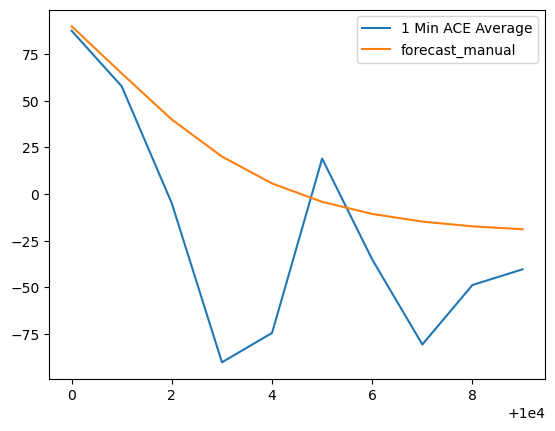

In [54]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df[['1 Min ACE Average','forecast_manual']].iloc[10000:10010].plot()


Doesn't forecast well after two steps, reverts to mean.

In [56]:
# import sys
# !conda install --yes --prefix {sys.prefix} pmdarima


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\chen5\anaconda3

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       haa95532_0         125 KB
    openssl-1.1.1s             |       h2bbff1b_0         5.5 MB
    pmdarima-1.8.5             |   py39h2bbff1b_0         528 KB
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  pmdarima           pkgs/main/win-64::pmdarima-1.8.5-py39h2bbff1b_0 None

The following packages will be UPDATED:

  ca-certificates                     2022.07.19-haa95532_0 --> 2022.10.11-haa95532_0 None
  openssl                                 1.1.1q-h2bbff1b_0 --> 1.1.1s-h2bbff1b_0 None




openssl-1.1.1s       | 5.5 MB   

In [57]:
# https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# Auto fit the data
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima


ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True)

In [58]:
auto_arima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -54152.151
Date:                Wed, 16 Nov 2022   AIC                         108314.303
Time:                        13:06:21   BIC                         108350.354
Sample:                             0   HQIC                        108326.506
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.006     -0.093      0.926      -0.013       0.012
ar.L1          1.1304      0.003    340.288      0.000       1.124       1.137
ar.L2         -0.3385      0.004    -82.561      0.000      -0.347      -0.330
ma.L1         -0.9889      0.002   -615.597      0.000      -0.992      -0.986
sigma2      2961.3877     10.895    271.824      0.000    2940.035    2982.741
===================================================================================
Ljung-Box (L1) (Q):                   2.30   Jarque-Bera (JB):           1505797.25
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.74
Prob(H) (two-sided):                  0.14   Kurtosis:                        63.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\chen5\AppData\Local\Temp\ipykernel_21368\1145186092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)


<AxesSubplot:>

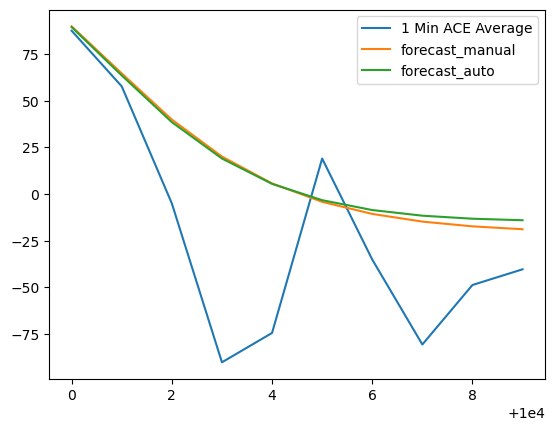

In [59]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

#df.plot()
df[['1 Min ACE Average','forecast_manual','forecast_auto']].iloc[10000:10010].plot()


pretty similar

### Differencing I/d parameter
Take a look at differencing

In [ ]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
# reference for differencing

In [13]:
dta_diff = dta.diff().dropna()

<AxesSubplot:>

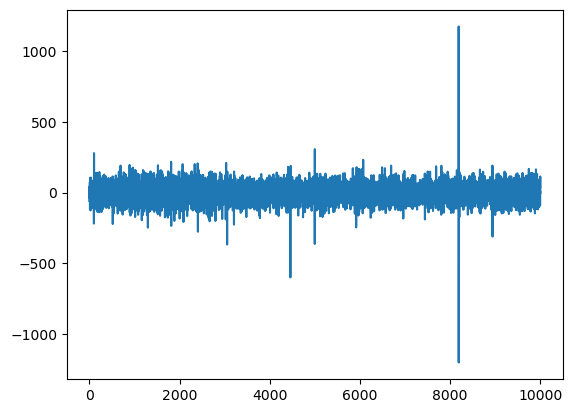

In [14]:
dta_diff.plot()

<AxesSubplot:>

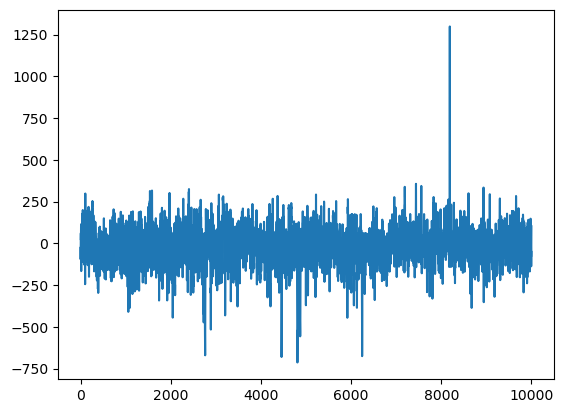

In [15]:
dta.plot()

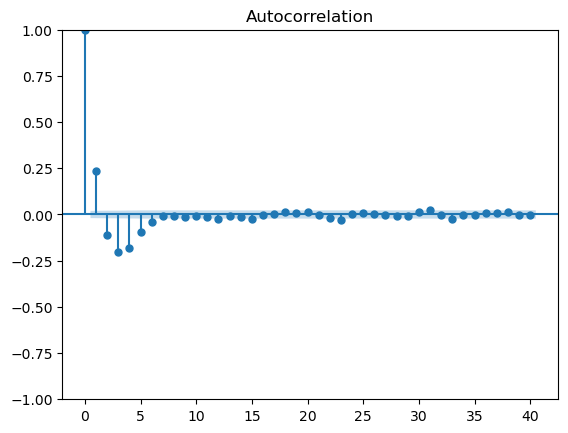

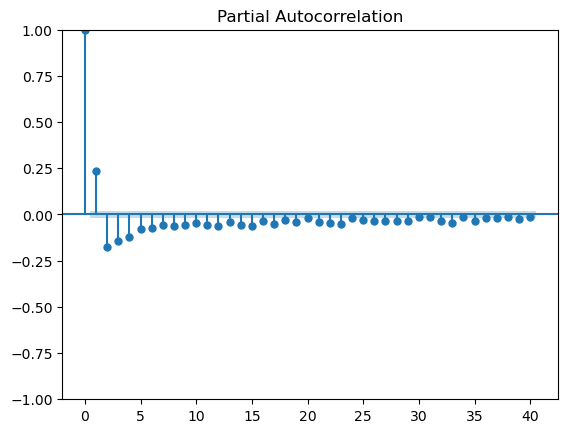

In [17]:
acf_diff = plot_acf(dta_diff)
pacf_diff = plot_pacf(dta_diff)

C:\Users\chen5\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


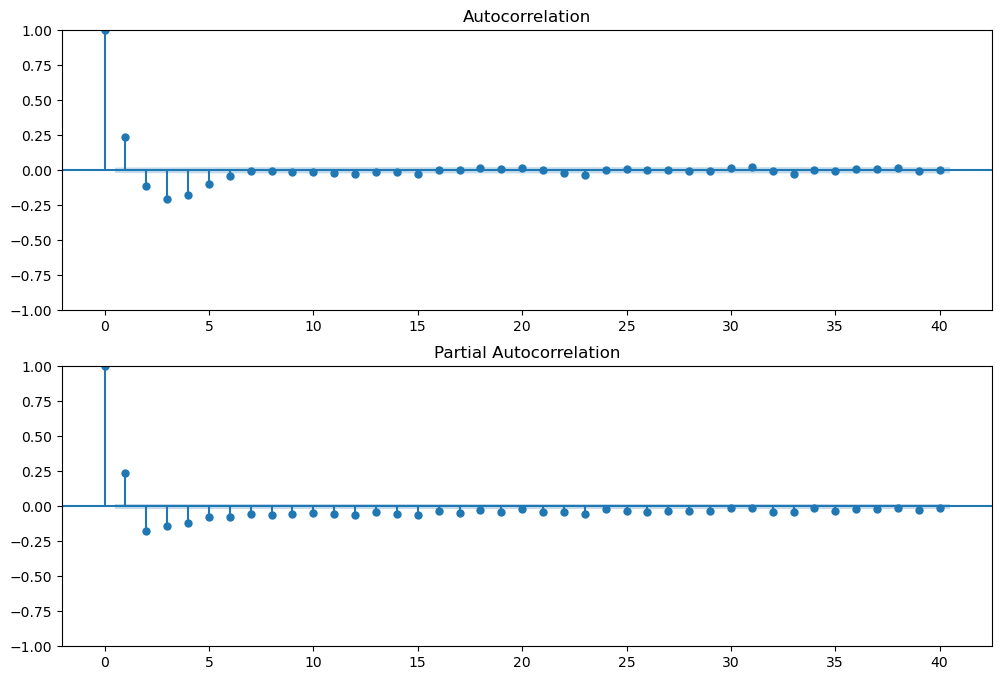

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta_diff.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta_diff, lags=40, ax=ax2)
plt.show()

The automatic fit chose ARIMA(2, 1, 1), but maybe I would chose ARIMA(2,1,3)? higher MA term?

Next: Seasonal ARIMA?

References:

https://otexts.com/fpp3/seasonal-arima.html

https://medium.com/geekculture/time-series-forecast-in-python-5c4c61e1c2c2

Lists of classical time series methods:

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://towardsdatascience.com/lets-forecast-your-time-series-using-classical-approaches-f84eb982212c (open in incognito/private mode if no subscription)